In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from sklearn.utils import shuffle
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [9]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

--2020-06-14 19:43:36--  http://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  16.7MB/s    in 13s     

2020-06-14 19:43:49 (14.9 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



In [10]:
!unzip  -n ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


In [11]:
!ls ml-20m

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


In [12]:
df = pd.read_csv("ml-20m/ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [0]:
#Makes sure that users are indexed from 1 to N
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

In [14]:
#Makes sure that users are indexed from 1 to N
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes
df

,userId,movieId,rating,timestamp,new_user_id,new_movie_id
0,1,2,3.5,1112486027,0,1
1,1,29,3.5,1112484676,0,28
2,1,32,3.5,1112484819,0,31
3,1,47,3.5,1112484727,0,46
4,1,50,3.5,1112484580,0,49
...,...,...,...,...,...,...
20000258,138493,68954,4.5,1258126920,138492,13754
20000259,138493,69526,4.5,1259865108,138492,13862
20000260,138493,69644,3.0,1260209457,138492,13875
20000261,138493,70286,5.0,1258126944,138492,13993


In [0]:
users = df['new_user_id']
movies = df['new_movie_id']
ratings = df['rating']

N = len(set(users))
M = len(set(movies))

# Set embedding dimension
K = 10

In [0]:
u = Input(shape = (1,))
i = Input(shape=(1,))
u_emb = Embedding(N, K)(u)#Nx1xK dimension
m_emb = Embedding(M, K)(i) # Nx1xK dimension
u_emb = Flatten()(u_emb) #NxK
m_emb = Flatten()(m_emb) #NxK
x = Concatenate()([u_emb, m_emb]) # Nx2K dimensions
x = Dense(1024, activation = "relu")(x)
x = Dense(1)(x)
model = Model(inputs = [u,i], outputs = x)

In [0]:
model.compile(optimizer=SGD(lr = 0.08, momentum =0.9), loss = "mse")

In [0]:
users, movies, ratings = shuffle(users, movies, ratings)
boundary = int(0.8 * len(users))
users_train = users[:boundary]
movies_train = movies[:boundary]
ratings_train = ratings[:boundary]

users_test = users[boundary:]
movies_test = movies[boundary:]
ratings_test = ratings[boundary:]

In [0]:
avg_rating = ratings_train.mean()
ratings_train = ratings_train - avg_rating
ratings_test = ratings_test - avg_rating

In [32]:
r = model.fit(x = [users_train, movies_train], y = ratings_train, verbose = 1, epochs = 1,batch_size = 1024, validation_data = ([users_test ,movies_test], ratings_test))

15626/15626 [==============================] - 91s 6ms/step - loss: 0.7713 - val_loss: 0.9147


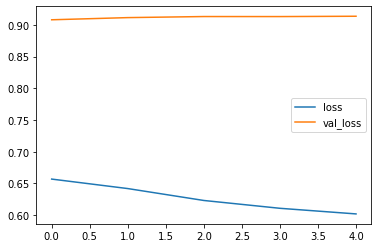

In [23]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

Unfortunately the recommender system isn't working well at predicting ratings accurately.